#### Link used
1) Medium  Link 2(used here) -> https://medium.com/@jon.froiland/recurrent-neural-networks-part-5-3997d0e40774<br>
2) AnalyticsVidya -> https://www.analyticsvidhya.com/blog/2017/12/introduction-to-recurrent-neural-networks/<br>
3) kaggle Link 2 -> https://www.kaggle.com/sidharkal/simplernn<br>
4) Medium(Must see, Vimp) -> https://medium.com/swlh/simple-rnn-deciphers-code-5603c9ce1b30<br>


In [27]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')

Loading data...


In [28]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print(input_train.shape)
print(y_train.shape)
print(input_test.shape)
print(y_test.shape)



<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
E:\Users\lenovo\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


25000 train sequences
25000 test sequences
(25000,)
(25000,)
(25000,)
(25000,)


E:\Users\lenovo\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [29]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)


Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [34]:
print(input_train[0].shape)
print(input_train[0])

(500,)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0

#### Build the model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
 
    
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
 
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [37]:
history = model.fit(input_train, y_train,
                     epochs=5,batch_size=128,validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 26s 156ms/step - loss: 0.6771 - acc: 0.5535 - val_loss: 0.4834 - val_acc: 0.7874
Epoch 2/5
157/157 [==============================] - 23s 148ms/step - loss: 0.4130 - acc: 0.8248 - val_loss: 0.3655 - val_acc: 0.8516
Epoch 3/5
157/157 [==============================] - 24s 153ms/step - loss: 0.3000 - acc: 0.8792 - val_loss: 0.3854 - val_acc: 0.8296
Epoch 4/5
157/157 [==============================] - 28s 175ms/step - loss: 0.2270 - acc: 0.9129 - val_loss: 0.4069 - val_acc: 0.8310
Epoch 5/5
157/157 [==============================] - 25s 158ms/step - loss: 0.1739 - acc: 0.9351 - val_loss: 0.4809 - val_acc: 0.8008


In [38]:
import matplotlib.pyplot as plt

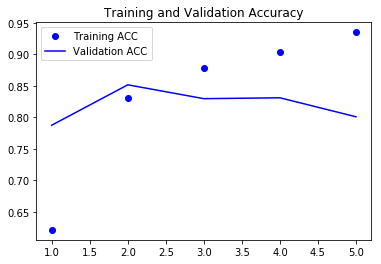

In [39]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training ACC')
plt.plot(epochs, val_acc, 'b', label='Validation ACC')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


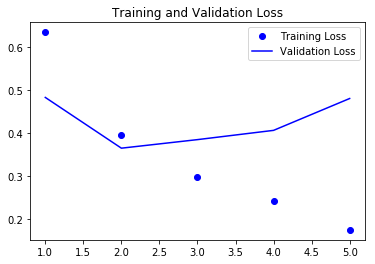

In [40]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()